In [1]:
# Basic Imports
import pathlib
from pathlib import Path
import os
import sys
from typing import Any, Sequence, Optional, Tuple, Iterator, Dict, Callable, Union
import json
import time
from tqdm.auto import tqdm
import numpy as np
from copy import copy
from glob import glob
from collections import defaultdict
import matplotlib.pyplot as plt

# Changing fonts to be latex typesetting
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif'

# JAX/Flax
import jax
from jax import jit
import jax.numpy as jnp
from jax import random

# Import created functions

import make_dataset as mkds

import visualization as vis

# import model as mdl


from numpy.random import default_rng
key = random.PRNGKey(42)
rng = default_rng(np.asarray(key))

# What is this notebook about?

1. Testing the speed boost I get from using JAX in my non-ML code ie. the code needed to create the dataset to **train** the NN.
2. Update numpy code to have a jaxified version
3. Compare the results of my jaxified non-ML code as a sanity check to make sure when refactoring no errors occurred.
- **NOTE:** non-ML code refers to `perturb` & `empirical_field` functions

Testing to see if using th JAX key in the numpy rng function creator outputs the same samples:

In [2]:
# key = random.PRNGKey(42)
# rng = default_rng(np.asarray(key))

# numpy_nums = rng.standard_normal(size=(10,))
# jax_nums = random.normal(key, shape=(10,))

# print(np.allclose(numpy_nums, jax_nums))
# print(numpy_nums)
# print(jax_nums)

The outputs of the samples are not the same between JAX & NumPY, so below we just compare how runtime scales with increasing number of samples. Below I'll compare visually the produced empirical field produced by each implementation

This notebook is a little experiment in testing the time speed of my `perturb` & `empirical_field` functions written in `NumPy` versus `JAX` 

In [3]:
train_ds, test_ds = mkds.download_MNIST()
train_data, train_labels = train_ds.data.numpy(), train_ds.targets.numpy()
train_data = mkds.reshape_with_channel_dim(train_data)

In [4]:
# %timeit mkds.perturb(train_data, rng)
# %timeit mkds.jax_perturb(train_data, key)

In [5]:
# %timeit mkds.empirical_field(train_data[:1000], rng)
# %timeit mkds.jax_empirical_field(train_data[:1000], key)

In [6]:
perturbed_train_data = mkds.process_perturbed_data(train_data, key)
%timeit mkds.process_perturbed_data(train_data, key)

1.73 s ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


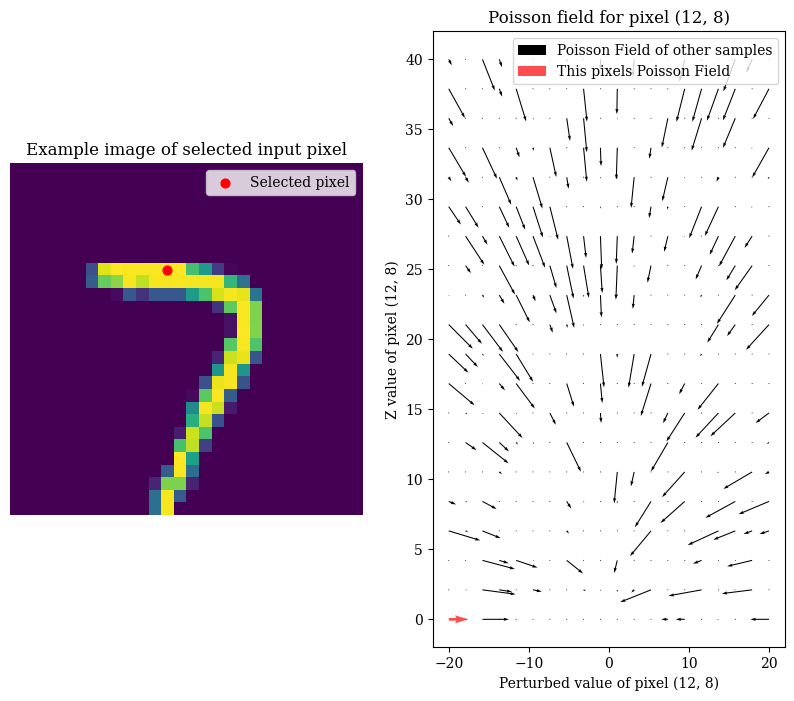

In [9]:
vis.jax_visualize_field_grid(batchsize=400,
                     sample_idx=0,
                     x_coord=12,
                     y_coord=8,
                     rng=key,
                     grid_lims=40,
                     figure_name='jax_empirical_grid.png')   

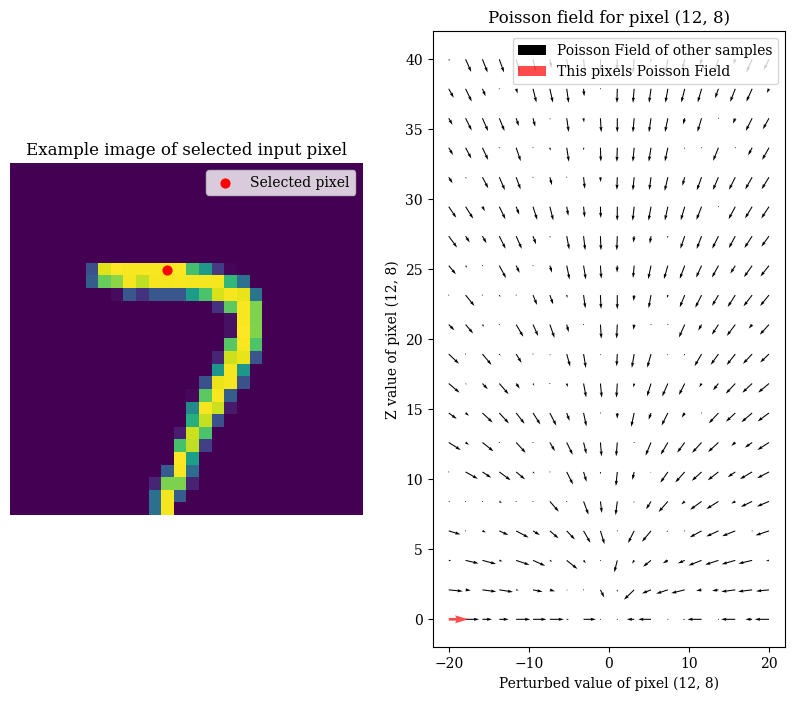

In [10]:
vis.visualize_field_grid(batchsize=400,
                     sample_idx=0,
                     x_coord=12,
                     y_coord=8,
                     rng=rng,
                     grid_lims=40)   
